<a href="https://colab.research.google.com/github/Ashkan-Agc/Image-Classification-with-ConvNet-Architecture/blob/main/Image_Classification_with_ConvNet_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [6]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Epoch 1/100
782/782 [==============================] - 9s 8ms/step - loss: 1.7986 - accuracy: 0.3323 - val_loss: 1.1770 - val_accuracy: 0.5763
Epoch 2/100
782/782 [==============================] - 6s 7ms/step - loss: 1.2095 - accuracy: 0.5648 - val_loss: 1.0190 - val_accuracy: 0.6432
Epoch 3/100
782/782 [==============================] - 6s 7ms/step - loss: 1.0060 - accuracy: 0.6431 - val_loss: 0.8630 - val_accuracy: 0.6908
Epoch 4/100
782/782 [==============================] - 6s 7ms/step - loss: 0.8705 - accuracy: 0.6963 - val_loss: 0.8145 - val_accuracy: 0.7187
Epoch 5/100
782/782 [==============================] - 6s 7ms/step - loss: 0.8092 - accuracy: 0.7165 - val_loss: 0.7914 - val_accuracy: 0.7261
Epoch 6/100
782/782 [==============================] - 6s 7ms/step - loss: 0.7657 - accuracy: 0.7309 - val_loss: 0.7449 - val_accuracy: 0.7426
Epoch 7/100
782/782 [==============================] - 6s 7ms/step - loss: 0.7044 - accuracy: 0.7525 - val_loss: 0.7250 - val_accuracy: 0.7540

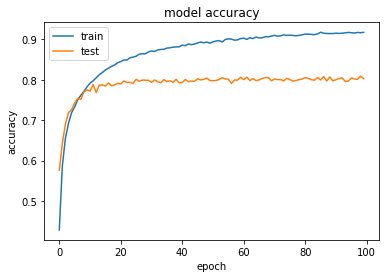

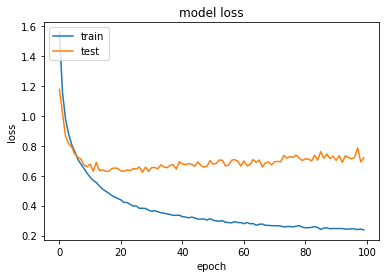

In [7]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_test, y_test),
    shuffle=True
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
# Save neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("model_weights.h5")


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0